**Numerical Analysis**

After gaining insight from the cdp data, we use the  aquastat data from Food and Agricultural Organization United Nations to solve the research questions.

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import the dataset**

In [ ]:
aquastat = pd.read_csv('aquastat.csv') 
aquastat.set_index('Country', inplace = True)
aquastat.head()

,Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in depth (mm/year),Total internal renewable water resources per capita (m3/inhab/yr),Water resources: total external renewable (10^9 m3/yr),Total renewable water resources per capita (m3/inhab/yr),Dam capacity per capita (m3/inhab),Total water withdrawal per capita (m<sup>3</sup>/year per inhabitant),Environmental Flow Requirements (10^9 m3/year),SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),Irrigated cropping intensity (%),Flood occurrence (WRI)
Country,,,,,,,,,,,,,,,,
Afghanistan,56.937048,563.983834,327.0,1268.430545,18.18,1757.509385,54.046171,548.072294,28.290,54.757019,0.935917,0.102132,31.220059,57.683901,100.508083,3.7
Albania,103.957447,5131.908959,1485.0,9331.399988,3.30,10476.144220,1397.975537,332.322721,13.560,5.757212,10.271394,1.677333,22.934273,31.387143,44.191050,2.7
Algeria,17.730059,4136.289853,89.0,266.337296,0.42,276.283207,204.110228,247.747914,4.560,137.920360,14.463198,0.619380,350.377103,22.294463,84.802372,2.8
Andorra,163.842553,42080.557690,NaN,4098.381944,NaN,4098.381944,NaN,NaN,0.188,NaN,NaN,NaN,NaN,NaN,NaN,3.3
Angola,24.713072,3441.269755,1010.0,4803.668393,0.40,4816.651280,306.565248,22.908305,110.700,1.871883,147.165978,0.244793,201.636011,173.777302,100.000000,1.7


**Data Description**

The data that you have to analyze consists of the following variables:
(We can  explain every variable here)

# **Data Preprocessing and exploration**

In [ ]:
aquastat.shape

(200, 16)

Data set has 200 rows and 16 columns

View the descriptive statistics of weight of container. We can do this for any numerical variable.

In [ ]:
#Data types
datadict = pd.DataFrame(aquastat.dtypes)
#Missing values
datadict['MissingVal'] = aquastat.isnull().sum()
#Unique values
datadict['NUnique']=aquastat.nunique()
#Count of variable
datadict['Count']=aquastat.count()
#Rename 0 to datatype
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Population density (inhab/km2),float64,0,200,200
GDP per capita (current US$/inhab),float64,4,196,196
Long-term average annual precipitation in depth (mm/year),float64,18,174,182
Total internal renewable water resources per capita (m3/inhab/yr),float64,17,183,183
Water resources: total external renewable (10^9 m3/yr),float64,5,115,195
Total renewable water resources per capita (m3/inhab/yr),float64,3,184,197
Dam capacity per capita (m3/inhab),float64,36,155,164
Total water withdrawal per capita (m<sup>3</sup>/year per inhabitant),float64,20,180,180
Environmental Flow Requirements (10^9 m3/year),float64,46,154,154
SDG 6.4.2. Water Stress (%),float64,22,178,178


In [ ]:
aquastat=aquastat.dropna()
aquastat.shape

(135, 16)

# ***Exploratory Data Analysis***

**Water Stress:SDG 6.4.2. Water Stress (%)**

From the initial analysis of CDP data, we found that the Water Stress is the biggest problem in the world.
So we are going to explore more about this variable.
According to FAO, A threshold of 25 percent has been identified as the upper limit for the full and unconditional safety of water stress as assessed by indicator 6.4.2. Water Stress can be categorized in following groups:
NO STRESS <25%,
LOW 25–50%,
MEDIUM 50–75%,
HIGH 75–100%.
CRITICAL >100%.

In [ ]:
aquastat['SDG 6.4.2. Water Stress (%)'].describe()

count    135.000000
mean      25.897402
std       34.343794
min        0.027446
25%        4.036426
50%       11.175115
75%       33.370910
max      168.924577
Name: SDG 6.4.2. Water Stress (%), dtype: float64

In [ ]:
#Group the water stress level according to FAO
def getlevel(x):
    if x["SDG 6.4.2. Water Stress (%)"] <25:
        return "NO STRESS"
    elif x["SDG 6.4.2. Water Stress (%)"] <50:
        return "LOW"
    elif x["SDG 6.4.2. Water Stress (%)"] <75:
        return "MEDIUM"
    elif x["SDG 6.4.2. Water Stress (%)"] <100:
        return "HIGH"
    else:
        return "CRITICAL"
aquastat.loc[:,"water stress level"] = aquastat.apply(getlevel,axis=1)


In [49]:
df_stress = aquastat.groupby("water stress level").size()
df_stress= pd.DataFrame(df_stress)
df_stress.columns = ["count"]
df_stress = df_stress.sort_values(by = ['count'], ascending = False)
df_stress = df_stress.reset_index()
df_stress.head()

,water stress level,count
0,NO STRESS,90
1,LOW,23
2,MEDIUM,9
3,CRITICAL,8
4,HIGH,5


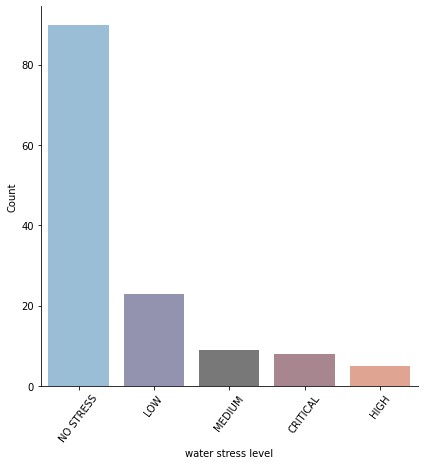

In [50]:
g = sns.catplot(
    data=df_stress, kind="bar", x = "water stress level", y="count", 
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=53)
g.set_axis_labels( "water stress level", "Count")

**Visualise the distribution of water stress on the world map**

In [31]:
pip install echarts-countries-pypkg

     |████████████████████████████████| 2.0 MB 22.6 MB/s 
  Using cached pyecharts_jupyter_installer-0.0.3-py2.py3-none-any.whl (4.7 kB)
  Created wheel for echarts-countries-pypkg: filename=echarts_countries_pypkg-0.1.6-py3-none-any.whl size=2118069 sha256=1c0de9a3022cd4e13d1dabe9b9562ceebfed540e59836160c49c07aece0f25d0
  Stored in directory: /root/.cache/pip/wheels/f2/37/b2/d78ef6e8e5a04e385af103d9d39b117d72a0f42945124fc51a
Successfully built echarts-countries-pypkg


In [32]:
import pyecharts

In [35]:
from pyecharts.charts import Map
from pyecharts import options as opts

In [37]:
countries= list(aquastat.index)
stress = list(aquastat["SDG 6.4.2. Water Stress (%)"])
list = [list(z) for z in zip(countries,stress)]

In [45]:
c = (
    Map(init_opts=opts.InitOpts(width="1000px", height="600px")) 
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Distribution of Water Stress, unit=%"),
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=175,
            range_text = ['Water Stress Level:', ''],  
            is_piecewise=True,  
            pos_top= "middle",  
            pos_left="left",
            orient="vertical",
            split_number=7 
        )
    )
    .add("stress",list,maptype="world")
    .render("Map1.html")
)


**Open the html link can see the distribution of water stress of the world.**

# **Modelling**

We are going to explore the facrors that influence the water stress.

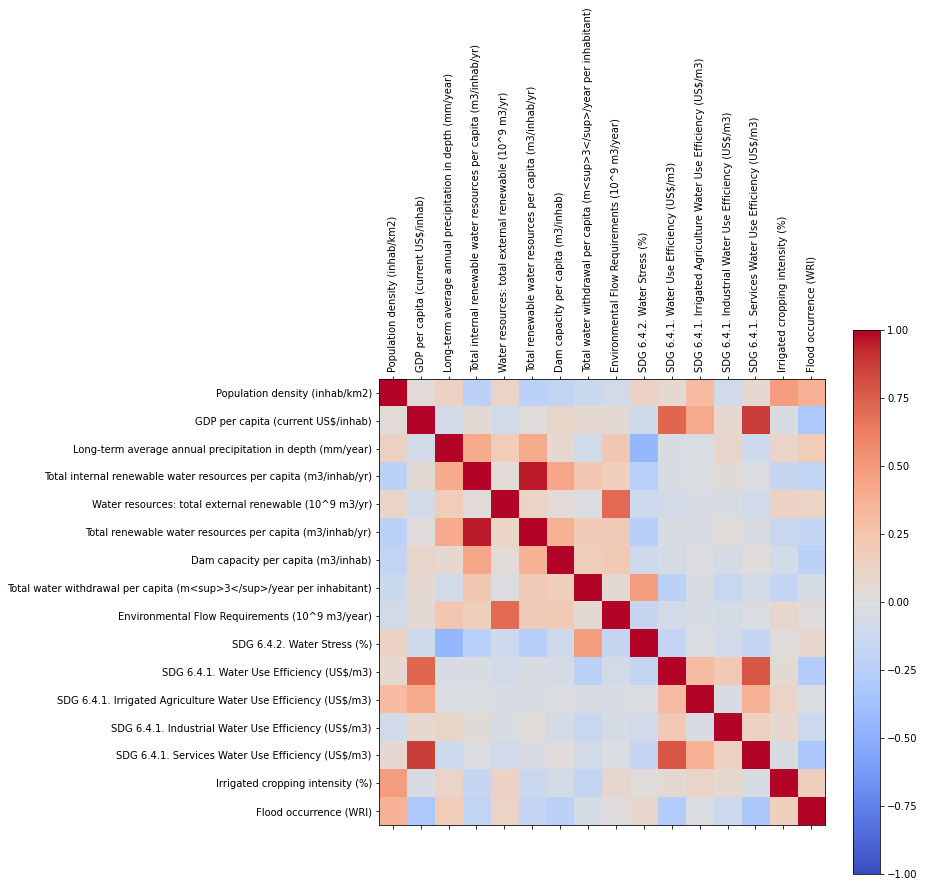

In [53]:
#Check the correlation\s
df=aquastat.iloc[:, :-1]
corr = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()